In [1]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)

# read elapsed_time_ms and current_mA

In [63]:
data_frame = pd.read_csv("tcp_as.csv", sep=" ", names=["elapsed_time_ms", "As"])
data_frame.describe()

,elapsed_time_ms,As
count,100.000000,100.000000
mean,241.570000,0.021031
std,32.115403,0.002591
min,193.000000,0.016300
25%,219.000000,0.019175
50%,236.000000,0.020600
75%,257.000000,0.022325
max,396.000000,0.032600


<AxesSubplot:>

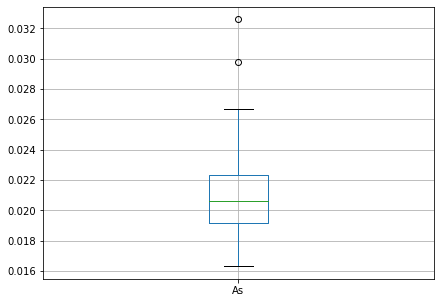

In [64]:
data_frame.boxplot(column="As")

<AxesSubplot:>

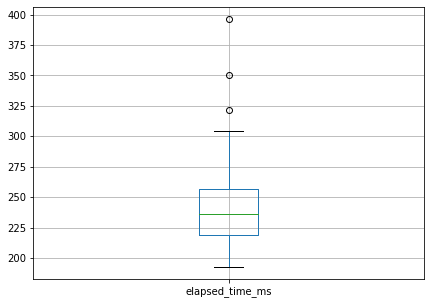

In [62]:
data_frame.boxplot(column="elapsed_time_ms")

In [65]:
data_frame = pd.read_csv("udp_as.csv", sep=" ", names=["elapsed_time_ms", "As"])
data_frame.describe()

,elapsed_time_ms,As
count,100.000000,100.000000
mean,95.970000,0.009227
std,1.058444,0.000581
min,94.000000,0.008200
25%,95.000000,0.008800
50%,96.000000,0.009100
75%,97.000000,0.009600
max,98.000000,0.010900


<AxesSubplot:>

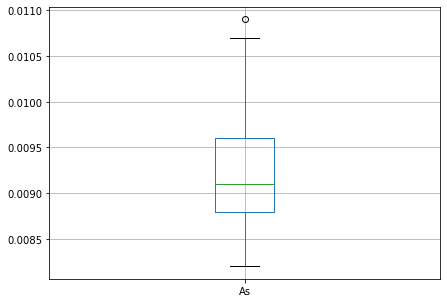

In [66]:
data_frame.boxplot(column="As")

<AxesSubplot:>

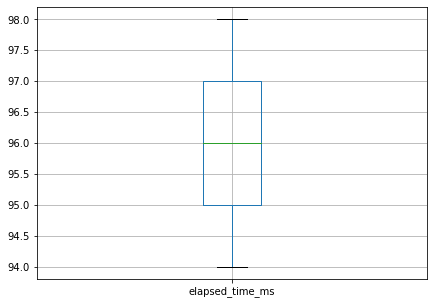

In [67]:
data_frame.boxplot(column="elapsed_time_ms")

In [4]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# Sending data over tcp

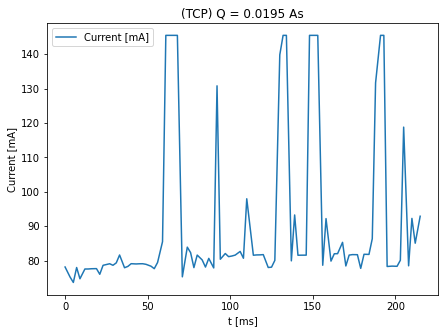

In [5]:
df_tcp = pd.read_csv("tcp/tcp_50.csv", sep=" ", names=["time_ms", "current_mA"])
plt.title("(TCP) " + calc_load_coulomb_str(df_tcp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_tcp.time_ms[:], df_tcp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()

# Sending data over udp

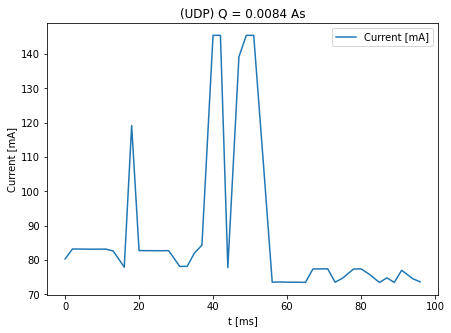

In [29]:
df_udp = pd.read_csv("udp/udp_50.csv", sep=" ", names=["time_ms", "current_mA"])
plt.title("(UDP) " + calc_load_coulomb_str(df_udp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_udp.time_ms[:], df_udp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()

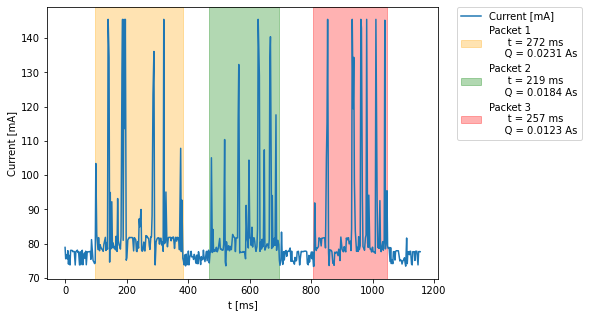

In [68]:
df_tcp = pd.read_csv("tcp_49_51.csv", sep=" ",  names=["time_ms", "current_mA", "sending"])
df_tcp.drop(df_tcp.columns[2], axis=1, inplace=True)
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_tcp.time_ms[:], df_tcp.current_mA[:], label="Current [mA]")
plt.axvspan(96, 383, color='orange', alpha=0.3, label="Packet 1 \n      t = " + str(372-100) + " ms\n     " + calc_load_coulomb_str(df_tcp[44:160]))
plt.axvspan(468, 695, color='green', alpha=0.3, label="Packet 2 \n      t = " + str(695-476) + " ms\n     " + calc_load_coulomb_str(df_tcp[204:297]))
plt.axvspan(808, 1048, color='red', alpha=0.3, label="Packet 3 \n      t = " + str(1054-797) + " ms\n     " + calc_load_coulomb_str(df_tcp[341:405]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

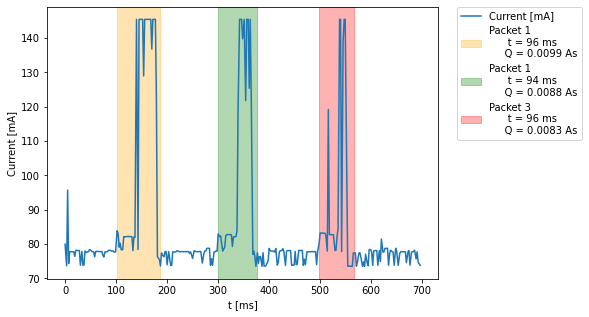

In [69]:
df_udp = pd.read_csv("udp_49_51.csv", sep=" ",  names=["time_ms", "current_mA", "is_sending"])
df_udp.drop(df_udp.columns[2], axis=1, inplace=True)
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_udp.time_ms[:], df_udp.current_mA[:], label="Current [mA]")
plt.axvspan(102, 187, color='orange', alpha=0.3, label="Packet 1 \n      t = " + str(198-102) + " ms\n     " + calc_load_coulomb_str(df_udp[45:87]))
plt.axvspan(300, 377, color='green', alpha=0.3, label="Packet 1 \n      t = " + str(394-300) + " ms\n     " + calc_load_coulomb_str(df_udp[132:173]))
plt.axvspan(498, 567, color='red', alpha=0.3, label="Packet 3 \n      t = " + str(594-498) + " ms\n     " + calc_load_coulomb_str(df_udp[217:258]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()